In [242]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

sns.set()
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-crime/test.csv.zip
/kaggle/input/sf-crime/sampleSubmission.csv.zip
/kaggle/input/sf-crime/train.csv.zip


In [243]:
import datetime

In [244]:
z = zipfile.ZipFile('/kaggle/input/sf-crime/test.csv.zip')
print(z.namelist())

['test.csv']


In [245]:
test = pd.read_csv(z.open('test.csv'))

In [246]:
z = zipfile.ZipFile('/kaggle/input/sf-crime/sampleSubmission.csv.zip')
print(z.namelist())

['sampleSubmission.csv']


In [247]:
sampleSubmission = pd.read_csv(z.open('sampleSubmission.csv'))

In [248]:
z = zipfile.ZipFile('/kaggle/input/sf-crime/train.csv.zip')
print(z.namelist())

['train.csv']


In [249]:
train = pd.read_csv(z.open('train.csv'))

In [250]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [251]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [252]:
y = train['Category']

In [253]:
train['year'] = train['Dates'].apply(lambda x : x.split()[0].split('-')[0])

In [254]:
train['Week'] = train['Dates'].apply(lambda x : x.split()[0].split('-')[1])

In [255]:
train['Hours'] = train['Dates'].apply(lambda x : x.split()[1].split(':')[0])

In [256]:
train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
year          0
Week          0
Hours         0
dtype: int64

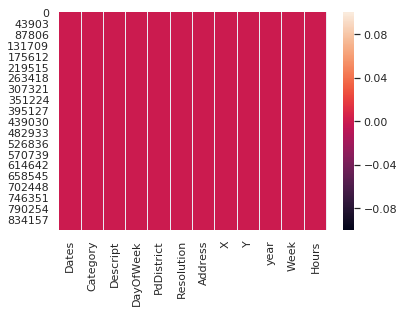

In [257]:
sns.heatmap(train.isnull())

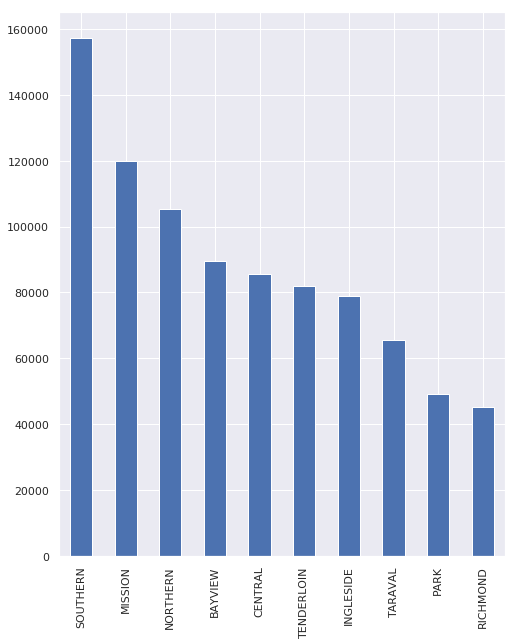

In [258]:
train.PdDistrict.value_counts().plot(kind='bar', figsize=(8,10))
plt.show()

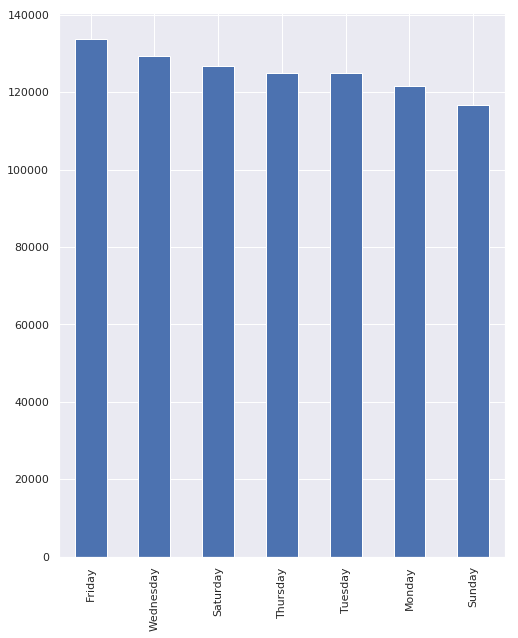

In [259]:
train['DayOfWeek'].value_counts().plot(kind='bar', figsize=(8,10))
plt.show()

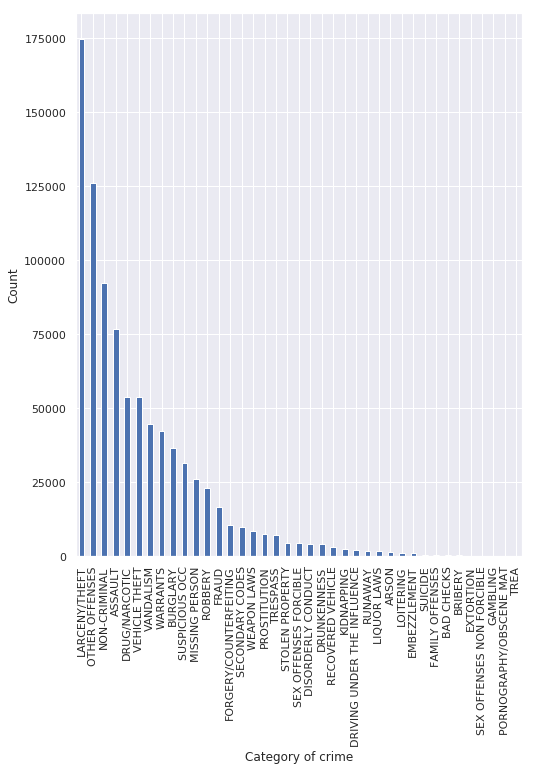

In [260]:
train['Category'].value_counts().plot(kind='bar', figsize=(8,10))
plt.xlabel('Category of crime')
plt.ylabel('Count')
plt.show()

In [261]:
target = train['Category'].unique()
print(target)

['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']


In [262]:
data_dict = {}
count = 1
for data in target:
    data_dict[data] = count
    count+=1
train["Category"] = train["Category"].replace(data_dict)

In [263]:
dayofweeks = train['DayOfWeek'].unique()
print(dayofweeks)

['Wednesday' 'Tuesday' 'Monday' 'Sunday' 'Saturday' 'Friday' 'Thursday']


In [264]:
data_week_dict = {
    "Monday":1,
    "Tuesday":2,
    "Wednesday":3,
    "Thursday":4,
    "Friday":5,
    "Saturday":6,
    "Sunday":7
}

In [265]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [266]:
train['DayOfWeek'] = train['DayOfWeek'].replace(data_week_dict)
test['DayOfWeek'] = test['DayOfWeek'].replace(data_week_dict)

In [267]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [268]:
train['PdDistrict'] = labelencoder.fit_transform(train['PdDistrict'])
test['PdDistrict'] = labelencoder.fit_transform(test['PdDistrict'])

In [269]:
train_data_columns = train.columns
print(train_data_columns)
test_data_columns = test.columns
print(test_data_columns)

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'year', 'Week', 'Hours'],
      dtype='object')
Index(['Id', 'Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')


In [270]:
corr = train.corr()
print(corr['Category'])

Category      1.000000
DayOfWeek    -0.016263
PdDistrict    0.005122
X             0.000147
Y            -0.005303
Name: Category, dtype: float64


In [271]:
corrMat = train[['Category','DayOfWeek','PdDistrict','X','Y']].corr()

In [272]:
mask = np.array(corrMat)
# print(mask)
mask[np.triu_indices_from(mask)] = False
# print(mask)

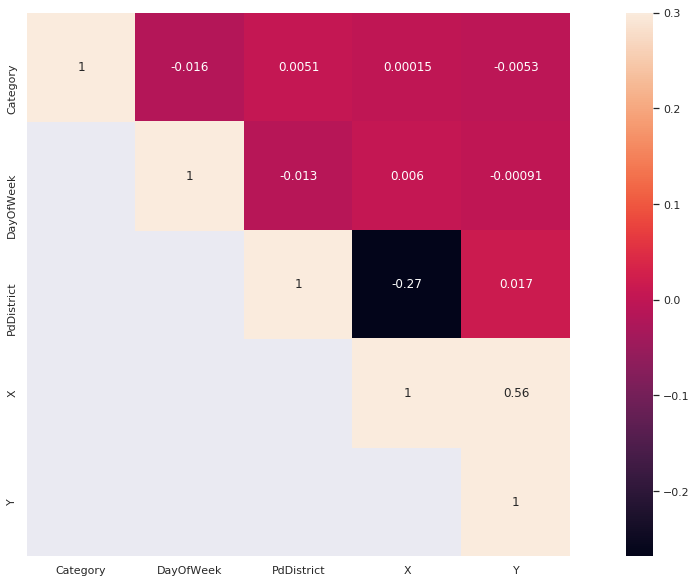

In [273]:
fig, ax = plt.subplots(figsize=(11, 9))
fig.set_size_inches(20,10)
sns.heatmap(corrMat,mask=mask,vmax=.3,square=True,annot=True)
plt.show()

In [274]:
skew = train.skew()
print(skew)

Category        1.662607
DayOfWeek      -0.005572
PdDistrict      0.029109
X              18.685494
Y             113.984988
dtype: float64


In [275]:
feautes = ["DayOfWeek","PdDistrict","X","Y"]

In [276]:
X_train = train[feautes]
y_train = train['Category']
X_test = test[feautes]

In [277]:
def rmsle(y,y_pred,convertExp = True):
  if convertExp:
    y = np.exp(y)
    y_pred = np.exp(y_pred)
  log1 = np.nan_to_num(np.array([np.log(v+1) for v in y]))
  log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_pred]))
  calc = (log1 - log2)**2
  # print(calc)
  return np.sqrt(np.mean(calc))

In [278]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Initialize logistic regression model
lModel = LinearRegression()

# Train the model
yLabelsLog = np.log1p(y_train)
lModel.fit(X = X_train,y = yLabelsLog)

# Make predictions
preds = lModel.predict(X= X_train)
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Linear Regression:  0.5839011809605271


In [279]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [290]:
from collections import OrderedDict
data_dict_new = OrderedDict(sorted(data_dict.items()))
print(data_dict_new)

OrderedDict([('ARSON', 26), ('ASSAULT', 8), ('BAD CHECKS', 36), ('BRIBERY', 29), ('BURGLARY', 10), ('DISORDERLY CONDUCT', 25), ('DRIVING UNDER THE INFLUENCE', 22), ('DRUG/NARCOTIC', 14), ('DRUNKENNESS', 12), ('EMBEZZLEMENT', 30), ('EXTORTION', 34), ('FAMILY OFFENSES', 27), ('FORGERY/COUNTERFEITING', 13), ('FRAUD', 19), ('GAMBLING', 35), ('KIDNAPPING', 20), ('LARCENY/THEFT', 3), ('LIQUOR LAWS', 28), ('LOITERING', 32), ('MISSING PERSON', 18), ('NON-CRIMINAL', 6), ('OTHER OFFENSES', 2), ('PORNOGRAPHY/OBSCENE MAT', 39), ('PROSTITUTION', 24), ('RECOVERED VEHICLE', 38), ('ROBBERY', 7), ('RUNAWAY', 21), ('SECONDARY CODES', 16), ('SEX OFFENSES FORCIBLE', 23), ('SEX OFFENSES NON FORCIBLE', 33), ('STOLEN PROPERTY', 15), ('SUICIDE', 31), ('SUSPICIOUS OCC', 11), ('TREA', 37), ('TRESPASS', 17), ('VANDALISM', 5), ('VEHICLE THEFT', 4), ('WARRANTS', 1), ('WEAPON LAWS', 9)])


In [291]:
result_dataframe = pd.DataFrame({
    "Id": test["Id"]
})
for key,value in data_dict_new.items():
    result_dataframe[key] = 0
count = 0
for item in predictions:
    for key,value in data_dict.items():
        if(value == item):
            result_dataframe[key][count] = 1
    count+=1
result_dataframe.to_csv("submission_knn.csv", index=False)

NameError: name 'test_data' is not defined